## Iris Flowers Classification

In [1]:
import pandas as pd
import  numpy as np
from matplotlib import pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("IRIS.csv", sep=",")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


##### Calculate lower limit and upper limit

In [3]:
sepal_length_IQR_value = df.sepal_length.quantile(0.75)-df.sepal_length.quantile(0.25)
print(sepal_length_IQR_value)
lower_limit_sepal_length = df.sepal_length.quantile(0.25) - 1.5*sepal_length_IQR_value
upper_limit_sepal_length = df.sepal_length.quantile(0.75) + 1.5*sepal_length_IQR_value
print(lower_limit_sepal_length,upper_limit_sepal_length)

sepal_width_IQR_value = df.sepal_width.quantile(0.75)-df.sepal_width.quantile(0.25)
print(sepal_width_IQR_value)
lower_limit_sepal_width = df.sepal_width.quantile(0.25) - 1.5*sepal_width_IQR_value
upper_limit_sepal_width = df.sepal_width.quantile(0.75) + 1.5*sepal_width_IQR_value
print(lower_limit_sepal_width,upper_limit_sepal_width)

petal_length_IQR_value = df.petal_length.quantile(0.75)-df.petal_length.quantile(0.25)
print(petal_length_IQR_value)
lower_limit_petal_length = df.petal_length.quantile(0.25) - 1.5*petal_length_IQR_value
upper_limit_petal_length = df.petal_length.quantile(0.75) + 1.5*petal_length_IQR_value
print(lower_limit_petal_length,upper_limit_petal_length )

petal_width_IQR_value = df.petal_width.quantile(0.75)-df.petal_width.quantile(0.25)
print(petal_width_IQR_value)
lower_limit_petal_width = df.petal_width.quantile(0.25) - 1.5*petal_width_IQR_value
upper_limit_petal_width = df.petal_width.quantile(0.75) + 1.5*petal_width_IQR_value
print(lower_limit_petal_width, upper_limit_petal_width )

1.3000000000000007
3.1499999999999986 8.350000000000001
0.5
2.05 4.05
3.4999999999999996
-3.649999999999999 10.349999999999998
1.5
-1.95 4.05


##### Outlier Data

In [4]:
df[(df.sepal_length < lower_limit_sepal_length) | (df.sepal_length > upper_limit_sepal_length)] 

,sepal_length,sepal_width,petal_length,petal_width,species


In [5]:
df[(df.sepal_width < lower_limit_sepal_width) | (df.sepal_width > upper_limit_sepal_width)] 

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [6]:
df[(df.petal_length < lower_limit_petal_length) | (df.petal_length > upper_limit_petal_length)] 

,sepal_length,sepal_width,petal_length,petal_width,species


In [7]:
df[(df.petal_width < lower_limit_petal_width) | (df.petal_width > upper_limit_petal_width)]

,sepal_length,sepal_width,petal_length,petal_width,species


In [8]:
df_filtering = df[(df.sepal_width > lower_limit_sepal_width) & (df.sepal_width < upper_limit_sepal_width)] 

In [9]:
df_filtering

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 

x = df_filtering[features]
y = df_filtering[['species']]
y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [11]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
# Scale
x=StandardScaler().fit_transform(x)
x

array([[-0.9105154 ,  1.1757891 , -1.3748782 , -1.34589856],
       [-1.15112218, -0.09392398, -1.3748782 , -1.34589856],
       [-1.39172896,  0.41396125, -1.43198551, -1.34589856],
       [-1.51203236,  0.16001863, -1.31777088, -1.34589856],
       [-1.03081879,  1.42973171, -1.3748782 , -1.34589856],
       [-0.54960522,  2.19155956, -1.20355625, -1.08196143],
       [-1.51203236,  0.92184648, -1.3748782 , -1.21392999],
       [-1.03081879,  0.92184648, -1.31777088, -1.34589856],
       [-1.75263914, -0.3478666 , -1.3748782 , -1.34589856],
       [-1.15112218,  0.16001863, -1.31777088, -1.47786712],
       [-0.54960522,  1.68367433, -1.31777088, -1.34589856],
       [-1.27142557,  0.92184648, -1.26066356, -1.34589856],
       [-1.27142557, -0.09392398, -1.3748782 , -1.47786712],
       [-1.87294253, -0.09392398, -1.54620014, -1.47786712],
       [-0.06839165,  2.44550218, -1.48909283, -1.34589856],
       [-0.54960522,  2.19155956, -1.43198551, -1.08196143],
       [-0.9105154 ,  1.

##### Reduce Data Dimensionality using PCA

In [13]:
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['feature 1', 'feature 2'])


In [14]:
principalDf

,feature 1,feature 2
0,-2.336739,0.660491
1,-2.145219,-0.611124
2,-2.432915,-0.218812
3,-2.366273,-0.495105
4,-2.463974,0.857315
...,...,...
141,1.827837,0.380674
142,1.527371,-1.014182
143,1.476925,0.269713
144,1.321825,1.129572


In [15]:
final_dataframe = pd.concat([principalDf, df_filtering[['species']]], axis = 1)

In [16]:
final_dataframe

,feature 1,feature 2,species
0,-2.336739,0.660491,Iris-setosa
1,-2.145219,-0.611124,Iris-setosa
2,-2.432915,-0.218812,Iris-setosa
3,-2.366273,-0.495105,Iris-setosa
4,-2.463974,0.857315,Iris-setosa
...,...,...,...
145,0.913320,0.002739,Iris-virginica
146,NaN,NaN,Iris-virginica
147,NaN,NaN,Iris-virginica
148,NaN,NaN,Iris-virginica


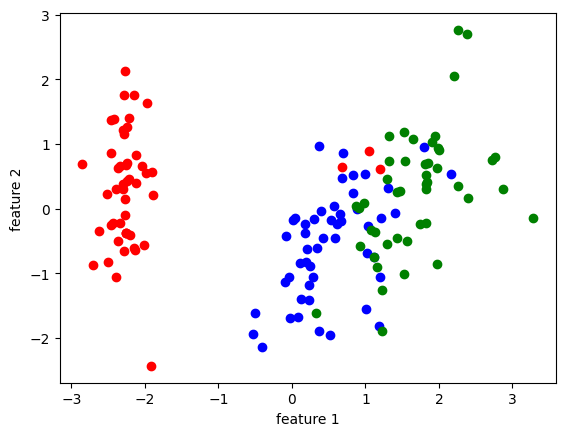

In [17]:
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors=['r','b','g']

plt.xlabel('feature 1')
plt.ylabel('feature 2')

for target , col in zip(targets,colors):
    dftemp=final_dataframe[df.species==target]
    plt.scatter(dftemp['feature 1'], dftemp['feature 2'], color = col)

In [18]:
pca.explained_variance_ratio_

array([0.72600625, 0.23072944])

In [19]:
pca.explained_variance_ratio_.sum()

0.956735686213838

In [20]:
final_dataframe = final_dataframe.dropna()
final_dataframe

,feature 1,feature 2,species
0,-2.336739,0.660491,Iris-setosa
1,-2.145219,-0.611124,Iris-setosa
2,-2.432915,-0.218812,Iris-setosa
3,-2.366273,-0.495105,Iris-setosa
4,-2.463974,0.857315,Iris-setosa
...,...,...,...
141,1.827837,0.380674,Iris-virginica
142,1.527371,-1.014182,Iris-virginica
143,1.476925,0.269713,Iris-virginica
144,1.321825,1.129572,Iris-virginica


In [21]:
# Defining Dependent and independent variables
Y=final_dataframe.species.values
X= final_dataframe.drop(["species"],axis=1) 

In [22]:
# Splitting Train and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X.values,Y,test_size = 0.2,random_state=1) 

In [23]:
# Importing logistic Regresssion and Training of the model
lorg = LogisticRegression(random_state=0)
lorg.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [24]:
print("Accuracy Prediction Score:",lorg.score(X_test,Y_test))

Accuracy Prediction Score: 0.7241379310344828


In [25]:
print("The model's score on the train set is ", lorg.score(X_train,Y_train))
    

The model's score on the train set is  0.9026548672566371


##### Prediction

In [26]:
prediction = lorg.predict(X_test)

In [27]:
confusion_matrix(Y_test,prediction)

array([[9, 2, 1],
       [0, 9, 2],
       [0, 3, 3]], dtype=int64)

In [28]:
new_input=np.array([[1.131636,-0.35385]])

In [29]:
lorg.predict(new_input)

array(['Iris-virginica'], dtype=object)